## Task 2: numpy’s Normal Distribution

### Problem Description
We want to see how effectively `numpy.random.normal()` generates data that appear normally distributed. Specifically:
- Generate **100,000** random values with mean = **10.0** and standard deviation = **3.0**.
- Use the **Shapiro-Wilk test** (`scipy.stats.shapiro()`) to check if our sample could come from a normal distribution.
- Plot a histogram of our generated data and overlay the theoretical **normal PDF** for comparison.


In [11]:
# Import Libaries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm

In [12]:
# 1. Set a random seed for reproducibility
np.random.seed(42)

In [13]:
# 2. Generate the sample
sample_size = 100_000
mean, std_dev = 10.0, 3.0
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

In [14]:
# 3. Shapiro-Wilk test for normality
test_stat, p_value = shapiro(sample)

print("Shapiro-Wilk Normality Test:")
print(f"  Test Statistic = {test_stat:.6f}")
print(f"  p-value        = {p_value:.6f}")

Shapiro-Wilk Normality Test:
  Test Statistic = 0.999992
  p-value        = 0.999962


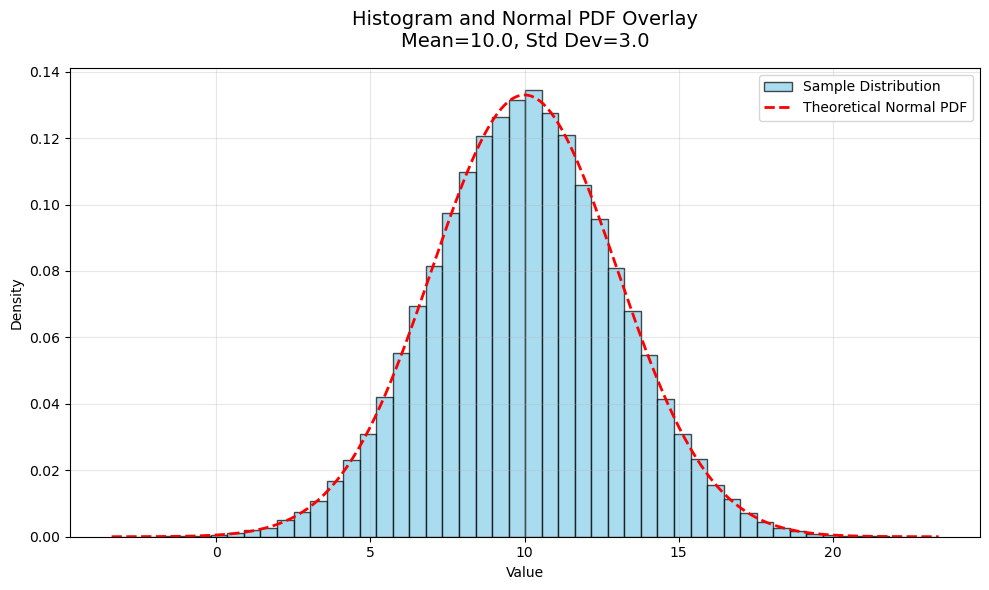

In [15]:
# 4. Plot histogram vs. theoretical normal PDF
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram with density=True for direct comparison to PDF
hist_vals, bin_edges, patches = ax.hist(
    sample, bins=50, density=True, alpha=0.7, color='skyblue',
    edgecolor='black', label='Sample Distribution'
)

# Create x-values for PDF over the observed range of data
x_vals = np.linspace(sample.min(), sample.max(), 300)
pdf_vals = norm.pdf(x_vals, loc=mean, scale=std_dev)

# Overlay the normal PDF
ax.plot(x_vals, pdf_vals, 'r--', linewidth=2, label='Theoretical Normal PDF')

# Labeling
ax.set_title(f"Histogram and Normal PDF Overlay\nMean={mean}, Std Dev={std_dev}", fontsize=14, pad=15)
ax.set_xlabel("Value")
ax.set_ylabel("Density")

# A light grid helps with readability
ax.grid(alpha=0.3)

# Legend to display labels
ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [16]:
# 5. Print basic statistics
print("\nSample Statistics:")
print(f"  Sample Mean:    {np.mean(sample):.4f} (Expected: {mean})")
print(f"  Sample Std Dev: {np.std(sample):.4f} (Expected: {std_dev})")


Sample Statistics:
  Sample Mean:    10.0029 (Expected: 10.0)
  Sample Std Dev: 3.0027 (Expected: 3.0)


### Discussion

1. **Interpretation of Shapiro-Wilk Test**  
   - The Shapiro-Wilk test checks whether the sample could plausibly come from a normal distribution.  
   - For large samples (like 100,000 points), even minimal deviations from normality might yield a small p-value, so always pair this test with visual methods.
   

2. **Histogram and PDF Overlay**  
   - By setting `density=True` in the histogram, we ensure the total area under the histogram is comparable to 1, making it directly comparable to the theoretical PDF.  
   - If the red PDF line overlaps the histogram shape reasonably well, it suggests the data follow the specified normal distribution parameters (mean = 10, std = 3).


3. **Overall Conclusion**  
   - Based on both the Shapiro-Wilk test output and the plotted distribution, we can assess whether the data appear normal.  
   - If the histogram is bell-shaped and the PDF aligns closely, and if the Shapiro-Wilk test p-value is not exceedingly small, it indicates `numpy.random.normal()` has generated a dataset consistent with a normal distribution of mean 10 and standard deviation 3.

### References

- McKinney, W. (2017). *Python for Data Analysis.* O’Reilly Media.  
- [SciPy Shapiro Test Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)  
- [SciPy Normal Distribution Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)  